In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sigma = 0.1  # Standard deviation.
k = 0.5
beta = -1.
rho1 = rho2 = 0.5
tau = 0.2  # Time constant.

In [3]:
dt = .0001  # Time step.
T = 2.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

reps = 50

In [4]:
sigma_bis = sigma * np.sqrt(1. / tau)
sqrtdt = np.sqrt(dt)

In [5]:
x1s = np.zeros((n,reps))
x2s = np.zeros((n,reps))
x1 = np.zeros(n)
x2 = np.zeros(n)

In [6]:
for rep in range(reps):
    x1 = np.zeros(n)
    x2 = np.zeros(n)
    for i in range(n - 1):
        x1[i + 1] = x1[i] + dt * ((rho1 - k * x1[i] + beta * x2[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x2[i + 1] = x2[i] + dt * ((rho2 - k * x2[i] + beta * x1[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x1[i + 1] = 0 if x1[i + 1] < 0 else x1[i + 1]
        x2[i + 1] = 0 if x2[i + 1] < 0 else x2[i + 1]
        
        x1s[:,rep] = x1
        x2s[:,rep] = x2

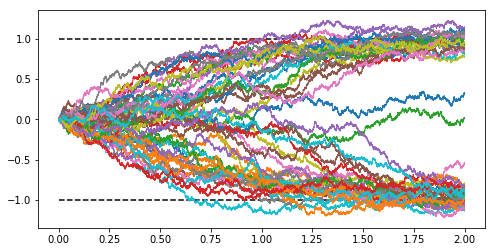

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x1s-x2s, lw=1)
ax.hlines(1., 0, T, linestyles='dashed')
ax.hlines(-1., 0, T, linestyles='dashed')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:232: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kde_color != color:


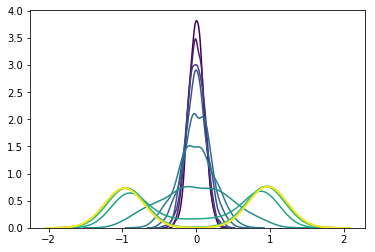

In [8]:
ntrials = 1000
nbins = 50

X1 = np.zeros(ntrials)
X2 = np.zeros(ntrials)

start = np.pi/3
end = np.pi
step = np.pi/18

angles = np.arange(start,end,step)
X = np.zeros((nbins,len(angles)))
colours = plt.cm.viridis(np.linspace(0,1,len(angles)))

for idx,ang in enumerate(angles):
    beta = -np.cos(ang)
    for i in range(n):
        # We update the process independently for all trials
        X1 += (dt * ((rho1 - k * X1 - beta * X2) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
        X2 += (dt * ((rho2 - k * X2 - beta * X1) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
        X1[np.where(X1 < 0)[0]] = 0
        X2[np.where(X2 < 0)[0]] = 0
        # We display the histogram for a few points in
        # time
        if i == 0.99*T/dt:
            densities,bns = np.histogram(X1-X2, bins=nbins)
            X[:,idx] = densities
            sns.distplot(X1-X2, bins=20, hist=False, norm_hist=True, kde_kws={"color": colours[idx]})

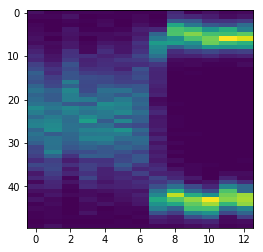

In [9]:
plt.imshow(X, aspect=0.25)

### Three-choice experiments

In [21]:
sigma = 0.1  # Standard deviation.
k = 0.5
beta1 = -1.
beta2 = -2.
rho1 = rho2 = rho3 = 0.5
tau = 0.2  # Time constant.

In [22]:
dt = .0001  # Time step.
T = 2.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

reps = 50

In [23]:
sigma_bis = sigma * np.sqrt(1. / tau)
sqrtdt = np.sqrt(dt)

In [24]:
x1s = np.zeros((n,reps))
x2s = np.zeros((n,reps))
x3s = np.zeros((n,reps))
x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)

In [25]:
for rep in range(reps):
    x1 = np.zeros(n)
    x2 = np.zeros(n)
    x3 = np.zeros(n)
    for i in range(n - 1):
        x1[i + 1] = x1[i] + dt * ((rho1 - k * x1[i] + beta1 * x2[i] + beta2 * x3[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x2[i + 1] = x2[i] + dt * ((rho2 - k * x2[i] + beta1 * x1[i] + beta1 * x3[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x3[i + 1] = x3[i] + dt * ((rho3 - k * x3[i] + beta2 * x1[i] + beta1 * x2[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x1[i + 1] = 0 if x1[i + 1] < 0 else x1[i + 1]
        x2[i + 1] = 0 if x2[i + 1] < 0 else x2[i + 1]
        x3[i + 1] = 0 if x3[i + 1] < 0 else x3[i + 1]
        
        x1s[:,rep] = x1
        x2s[:,rep] = x2
        x3s[:,rep] = x3

(array([ 3.,  1.,  3.,  3.,  0.,  0.,  0.,  0.,  0., 28.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.,  4.,  4.,  1.]),
 array([-1.14682201, -1.0279659 , -0.90910979, -0.79025368, -0.67139757,
        -0.55254147, -0.43368536, -0.31482925, -0.19597314, -0.07711703,
         0.04173908,  0.16059518,  0.27945129,  0.3983074 ,  0.51716351,
         0.63601962,  0.75487573,  0.87373183,  0.99258794,  1.11144405,
         1.23030016]),
 <a list of 20 Patch objects>)

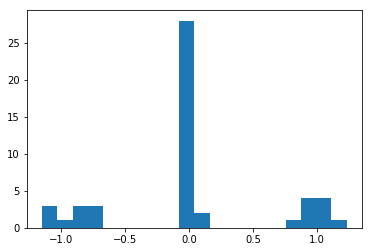

In [38]:
plt.hist(x1s[19999,:]-x3s[19999,:],bins=20)

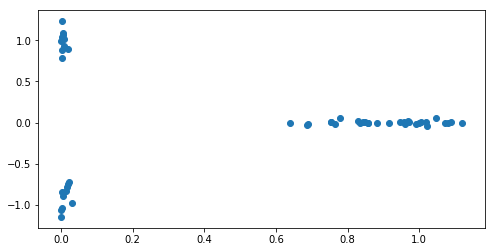

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(x2s[19999,:], x1s[19999,:]-x3s[19999,:])

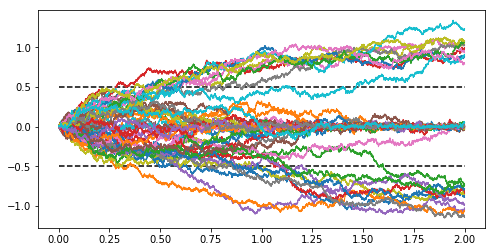

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x1s-x3s, lw=1)
ax.hlines(0.5, 0, T, linestyles='dashed')
ax.hlines(-0.5, 0, T, linestyles='dashed')

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:232: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kde_color != color:


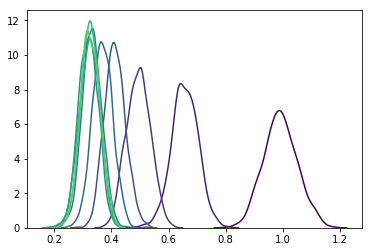

In [27]:
ntrials = 1000
nbins = 50

X1 = np.zeros(ntrials)
X2 = np.zeros(ntrials)
X3 = np.zeros(ntrials)

start = 0
end = -2
step = -0.2

inhibitions = np.arange(start,end,step)
X = np.zeros((nbins,len(angles)))
colours = plt.cm.viridis(np.linspace(0,1,len(angles)))

for idx,beta in enumerate(inhibitions):
    beta1 = beta
    beta2 = beta/2
    for i in range(n):
        # We update the process independently for all trials
        X1 += (dt * ((rho1 - k * X1 + beta2 * X2 + beta1 * X3) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
        X2 += (dt * ((rho2 - k * X2 + beta2 * X1 + beta2 * X3) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
        X3 += (dt * ((rho3 - k * X3 + beta1 * X1 + beta2 * X2) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
        X1[np.where(X1 < 0)[0]] = 0
        X2[np.where(X2 < 0)[0]] = 0
        X3[np.where(X3 < 0)[0]] = 0
        # We display the histogram for a few points in
        # time
        if i == 0.99*T/dt:
            densities1,bns1 = np.histogram(X1, bins=nbins)
            densities2,bns3 = np.histogram(X2, bins=nbins)
            densities3,bns2 = np.histogram(X3, bins=nbins)
            X[:,idx] = densities1+densities2+densities3
            sns.distplot((X1+X2+X3)/3, bins=20, hist=False, norm_hist=True, kde_kws={"color": colours[idx]})

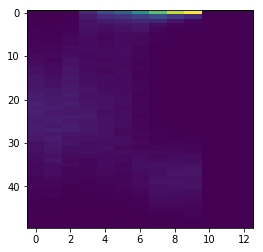

In [28]:
plt.imshow(X, aspect=0.25)